In [1]:
import time
# get the start time
st = time.time()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import *
import math

d=4
g = 0.2    
T,M,W =  2, 17, 30     
hbar=1
m00, p00, n00= 1, 3, 1
Omn = 1
Vpq = 1

xi = exp(2*pi*(1j)/d)
wr = lambda r : r * 2*pi/T                    # wn = w(r) = \omega(r) = r\omega_0 = r.w(1)
N = int(W/wr(1))                              # number of Alvarez-Suter expreriments in each measurement set
print(N)

def delta(s1,s2):                            # kronecker delta function 
    if s1 == s2:    return 1
    else:           return 0

def deltai(s1,s2,i):                            # kronecker delta function when numbers are repeating with mod i
    if fmod(s1,i) == fmod(s2,i):    return 1
    else:                                     return 0
    
def fmodm(a):
    return int(fmod(-a,d)) 

9


In [3]:
def y(i0,j0,a,b):
       return deltai(a,b,d) +  1/d * (xi**(-b*j0) - xi**(-b*i0)) * (xi**(a*i0) - xi**(a*j0))

In [4]:
yVec =  np.zeros([d,d,d,d],dtype=complex)
measure =  np.zeros([d,d,d,d],dtype=complex)

yVec    = [[[[complex(y(i0,j0,a0,b0)) for b0 in range(d)]  for a0 in range(d)] for j0 in range(d)] for i0 in range(d)]
measure = [[[[complex(y(i0,j0,a0,b0)-np.conj(y(i0,j0,-a0,-b0))) for b0 in range(d)] \
                                                                 for a0 in range(d)] for j0 in range(d)] for i0 in range(d)]

print(yVec)
print(np.max(np.abs(measure)))

[[[[(1+0j), 0j, 0j, 0j], [0j, (1+0j), 0j, 0j], [0j, 0j, (1+0j), 0j], [0j, 0j, 0j, (1+0j)]], [[(1+0j), 0j, 0j, 0j], [0j, (0.5+0j), (-0.5+0.49999999999999994j), (-2.7755575615628907e-17+0.5j)], [0j, (-0.5-0.49999999999999994j), 0j, (-0.5000000000000001+0.5j)], [0j, (-2.7755575615628907e-17-0.5j), (-0.5000000000000001-0.5j), (0.4999999999999999+0j)]], [[(1+0j), 0j, 0j, 0j], [0j, 0j, (7.498798913309288e-33+1.2246467991473532e-16j), (-1-1.2246467991473535e-16j)], [0j, (7.498798913309288e-33-1.2246467991473532e-16j), (1+0j), (2.2496396739927867e-32-1.2246467991473532e-16j)], [0j, (-1+1.224646799147353e-16j), (2.2496396739927864e-32+1.2246467991473532e-16j), -2.465190328815662e-32j]], [[(1+0j), 0j, 0j, 0j], [0j, (0.4999999999999999+0j), (-0.5-0.5000000000000001j), (8.326672684688677e-17-0.4999999999999999j)], [0j, (-0.5+0.5000000000000001j), -2.465190328815662e-32j, (-0.49999999999999983-0.4999999999999999j)], [0j, (8.326672684688677e-17+0.4999999999999999j), (-0.49999999999999983+0.499999999

In [5]:
def f(a,b,w,r):
    return (-1j)/w*\
                    nsum(lambda i: y(i,i+1,a,b)*\
                        ( exp( (1j) *w *(i+1)*T/(d*r) ) - \
                          exp( (1j) *w * i   *T/(d*r) ) ),[0,d-1])

ff =  np.zeros([d,d,N,N],dtype=complex)  
measuref =  np.zeros([d,d,N,N],dtype=complex)  

print(np.shape(ff))

ff = [[[[ complex(f(a, b, (k+1)*wr(1), r+1))  for r in range(N)]  for k in range(N)]   for b in range(d)]  for a in range(d)]
measuref = [[[[ complex(f(a, b, (k+1)*wr(1), r+1) - np.conj(f(-a, -b, -(k+1)*wr(1), r+1)))  for r in range(N)]\
                                                                                   for k in range(N)]\
                                                                                   for b in range(d)]  for a in range(d)]

print(ff[int(1)][int(2)][int(0)][int(0)])
print(np.shape(ff))
print(np.max(np.abs(measuref)))

(4, 4, 9, 9)
(-1.2732395447351628+3.533949646070574e-17j)
(4, 4, 9, 9)
4.4389021509308834e-32


In [6]:
def LLf(b,bt):   
    return  d*Omn*Vpq *  (  1-xi**(n00*b) )  *  ( 1-xi**(n00*bt) )  *   xi**(n00 * m00)

LL = np.zeros([d,d],dtype=complex)

LL = [[ complex(LLf(b,bt)) for bt in range(d)]  for b in range(d)]
print(LL)

[[0j, 0j, 0j, 0j], [0j, (7.999999999999999-1.3780371393590664e-15j), (8+7.999999999999997j), (1.8221263492091292e-15+8j)], [0j, (8+7.999999999999997j), (2.9391523179536475e-15+16j), (-7.999999999999998+8.000000000000002j)], [0j, (1.8221263492091292e-15+8j), (-7.999999999999998+8.000000000000002j), (-8.000000000000002+2.266215559059192e-15j)]]


In [7]:
def fafunc(a):
    return hbar/d * nsum(lambda p: ( (d-1)/2  -p ) * xi**(-a*p) ,[0,d-1])

fa = np.zeros([d],dtype=complex)

fa = [ complex(fafunc(a)) for a in range(d)]
print(fa)

[0j, (0.5000000000000001-0.5j), (0.5+9.18485099360515e-17j), (0.4999999999999998+0.5j)]


In [8]:
def Xifunc(k,r):
         return  nsum(lambda a,at,b,bt: \
                     fa[int(a)]*fa[int(at)] * \
                     LL[int(b)][int(bt)]  * \
                     deltai(  int( fmod( m00 + p00 , d ) )  ,  int( fmodm( b+bt ) )  ,d ) * \
                      \
              complex(ff[int(a)][int(b)][int(k)][int(r)]) * complex( np.conj( ff[int(-at)][int(-bt)][int(k)][int(r)] )  )\
                  ,[0,d-1],[0,d-1],[0,d-1],[0,d-1])
    
VecXi =  np.zeros([N,N],dtype=complex)  

VecXi = [[ complex(Xifunc(k,r))  for k in range(N)]  for r in range(N)]

#print(VecXi)
print(np.matrix(VecXi))

[[-2.38990830e-15+1.62113894e+01j -3.41415471e-16+3.24227788e+00j
  -2.65545367e-16+1.80126549e+00j -1.28010298e-48+1.21565949e-32j
  -9.55963320e-17+6.48455575e-01j -3.79350524e-17+3.60253097e-01j
  -4.87736388e-17+3.30844681e-01j -1.28010298e-48+1.21565949e-32j
  -2.95050407e-17+2.00140610e-01j]
 [-1.02695630e-15+3.99524195e+00j -5.97477075e-16+4.05284735e+00j
   5.55111512e-17+1.71760281e+00j -8.53538679e-17+8.10569469e-01j
  -2.08166817e-17+6.18337012e-01j -6.63863417e-17+4.50316372e-01j
  -2.03830008e-17+8.15355499e-02j -3.20025746e-49+3.03914873e-33j
  -1.12757026e-17+4.93239747e-02j]
 [-2.77555756e-16+1.38264619e+00j -4.23272528e-16+2.02642367e+00j
  -2.65545367e-16+1.80126549e+00j -4.16333634e-17+1.06387243e+00j
   0.00000000e+00+5.60726949e-01j -3.79350524e-17+3.60253097e-01j
  -6.93889390e-18+2.86085178e-01j -1.56125113e-17+2.65968107e-01j
  -2.95050407e-17+2.00140610e-01j]
 [-1.45716772e-16+6.68822716e-01j -2.56739074e-16+9.98810487e-01j
  -2.39391840e-16+1.15952956e+00j -1.

In [9]:
AMat = np.zeros([N,N], dtype=complex)      

AMat = [[ complex(delta( (k+1)/(r+1) , floor( (k+1)/(r+1) ) ) *  M*wr(r+1)*  VecXi[r][k]   )    \
         for k in range(N)]  for r in range(N)]

#print(A)
print(np.matrix(AMat))

[[-1.27638012e-13+8.65802890e+02j -1.82340017e-14+1.73160578e+02j
  -1.41820013e-14+9.62003212e+01j -6.83665562e-47+6.49248177e-31j
  -5.10552048e-15+3.46321156e+01j -2.02600019e-15+1.92400642e+01j
  -2.60485739e-15+1.76694467e+01j -6.83665562e-47+6.49248177e-31j
  -1.57577793e-15+1.06889246e+01j]
 [ 0.00000000e+00+0.00000000e+00j -6.38190060e-14+4.32901445e+02j
   0.00000000e+00+0.00000000e+00j -9.11700086e-15+8.65802890e+01j
   0.00000000e+00+0.00000000e+00j -7.09100067e-15+4.81001606e+01j
   0.00000000e+00+0.00000000e+00j -3.41832781e-47+3.24624089e-31j
   0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  -4.25460040e-14+2.88600963e+02j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -6.07800058e-15+5.77201927e+01j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  -4.72733378e-15+3.20667737e+01j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -3.

In [10]:
def phi(i,n,r):
    return ( i / d + n ) * T/(r+1)

def Phii(l,i1,i2,n1,n2,r):
    if  l==1:    return    (1j) * ( phi( i1+1 , n1 , r ) - phi( i2+1 , n2 , r )  )   
    if  l==2:    return    (1j) * ( phi( i1+1 , n1 , r ) - phi( i2   , n2 , r )  )    
    if  l==3:    return    (1j) * ( phi( i1   , n1 , r ) - phi( i2+1 , n2 , r )  )   
    if  l==4:    return    (1j) * ( phi( i1   , n1 , r ) - phi( i2   , n2 , r )  )  

In [11]:
def spectA1(w):
    return  0.5*exp(-0.9*(w-21)**2) + 1.5*exp(-0.06/0.7*(w-13)**2)
#def spectA2(w):
#    return  exp(-0.16*(w-3)**2)+exp(-0.2/0.7*(w-9)**2)+exp(-0.03*(w-14)**2)
#def spectA3(w):
#    return  1.5/(1+np.abs(w-wr(1)))
spect1  = []
#spect2  = []
#spect3  = []
w1 = wr(1)*np.arange(1, N+0.05, 0.05)
for i in range(len(w1)):
    spect1.append(spectA1(w1[i]))
#    spect2.append(spectA2(w1[i]))
#    spect3.append(spectA3(w1[i]))

In [12]:
LancilaVec = np.zeros( [d,d,M,M,N,3] , dtype=complex)
w1increments = 300
w1list = np.linspace(float(wr(1)),W,w1increments)

for i1 in range(d):
    for i2 in range(d):
        for n1 in range(M):
            for n2 in range(M):
                for r in range(N):
                    for spect_num in range(1,1+1): #3+1-->1+1
                        if spect_num == 1:
                            fytList1 = [( exp(w1*Phii(1,i1,i2,n1,n2,r)) - exp(w1*Phii(2,i1,i2,n1,n2,r)) -\
                                          exp(w1*Phii(3,i1,i2,n1,n2,r)) + exp(w1*Phii(4,i1,i2,n1,n2,r))  )\
                                          * spectA1(w1)/w1**2 for w1 in w1list]
                            LancilaVec[i1][i2][n1][n2][r][spect_num-1] = np.trapz(fytList1, w1list)
#                        elif spect_num == 2:
#                            fytList2 = [( exp(w1*Phii(1,i1,i2,n1,n2,r)) - exp(w1*Phii(2,i1,i2,n1,n2,r)) -\
#                                          exp(w1*Phii(3,i1,i2,n1,n2,r)) + exp(w1*Phii(4,i1,i2,n1,n2,r))  )\
#                                          * spectA2(w1)/w1**2 for w1 in w1list]
#                            LancilaVec[i1][i2][n1][n2][r][spect_num-1] = np.trapz(fytList2, w1list)
#                        elif spect_num == 3:
#                            fytList3 = [( exp(w1*Phii(1,i1,i2,n1,n2,r)) - exp(w1*Phii(2,i1,i2,n1,n2,r)) -\
#                                          exp(w1*Phii(3,i1,i2,n1,n2,r)) + exp(w1*Phii(4,i1,i2,n1,n2,r))  )\
#                                          * spectA3(w1)/w1**2 for w1 in w1list]
#                            LancilaVec[i1][i2][n1][n2][r][spect_num-1] = np.trapz(fytList3, w1list)                        


In [13]:
def IntVecfunc(a,b,at,bt,r,spect_num):
    return complex(  sum(   \
                             yVec[int(i1)][int(fmod((i1+1),d))][int(a)][int(b)] * \
                             yVec[int(i2)][int(fmod((i2+1),d))][at][bt] * \
                             LancilaVec[int(i1)][int(i2)][int(n1)][int(n2)][int(r)][spect_num]   \
              for  i1  in  range(d)    for i2 in range(d)    for n1 in  range(M)   for n2 in range(M)    )  ) 

def IntVec1(d0,N0):
    IntVec0 = np.zeros([d0,d0,d0,d0,N0,3],dtype=complex)
        #IntVec0 = [[[[[ complex(IntVecfunc(a0,b0,at0,bt0,r0)) for r0 in range(N0)] for bt0 in range(d0)] for at0 in range(d0)]\
        #                                           for b0 in range(d0)]    for a0 in range(d0)]\
        #yield IntVec0
    for a0 in range(d0):
        for b0 in range(d0):
            for at0 in range(d0):
                for bt0 in range(d0):
                    for r0 in range(N0):
                        for spect_num in range(3):
                                IntVec0[a0][b0][at0][bt0][r0][spect_num] = IntVecfunc(a0,b0,at0,bt0,r0,spect_num)
                                yield IntVec0

for x in IntVec1(d,N):
    #print(np.shape(x))
    IntVec = x
    #print(IntVec)
print(np.shape(IntVec))

(4, 4, 4, 4, 9, 3)


In [14]:
P = lambda s,smax : int(s/smax)         
Q = lambda s,smax : np.remainder(s,smax) 

bPn = np.zeros([N,3],dtype=complex)

bPn = [[ complex( nsum(lambda a,b,at,bt: \
                          fa[int(a)]*fa[int(at)] *\
                          LL[int(b)][int(bt)] *\
                          deltai(  int( fmod( m00 + p00 , d ) )  ,  int( fmodm( b+bt ) )  ,d ) * \
                          IntVec[int(a)][int(b)][int(at)][int(bt)][int( r )][int( i )] \
                          ,[0,d-1],[0,d-1],[0,d-1],[0,d-1])  )  for r in range(N)] for i in range(3)]

print(bPn[:][0])

[(1.942890293094024e-14+86.46370933434928j), (-3.9218628344883655e-14+145.76434507473328j), (-1.7680301667155618e-14+151.22201437641473j), (-1.377509217803663e-13+307.96957502924084j), (7.840950111415168e-15+139.01761846068734j), (-7.757683384568281e-15+19.922263415359332j), (-9.027500968983304e-15+28.54140100572134j), (1.4363510381087963e-15+1.8810447212585841j), (-2.1024848528838902e-15+1.13656532779922j)]


In [15]:
x1 = np.zeros([N],dtype=complex)
#x2 = np.zeros([N],dtype=complex)
#x3 = np.zeros([N],dtype=complex)

for i in range(3):
    x1 = np.linalg.lstsq(AMat,bPn[:][0], rcond = None)
#    x2 = np.linalg.lstsq(AMat,bPn[:][1], rcond = None)
#    x3 = np.linalg.lstsq(AMat,bPn[:][2], rcond = None)
    result1 = np.real(x1[0])
#    result2 = np.real(x2[0])
#    result3 = np.real(x3[0])


In [16]:
S1 = []
#S2 = []
#S3 = []
for n in range(N):
    S1.append(result1[n])
#    S2.append(result2[n])
#    S3.append(result3[n])
omega = []
for n in range(N):
    omega.append((n+1)*wr(1))

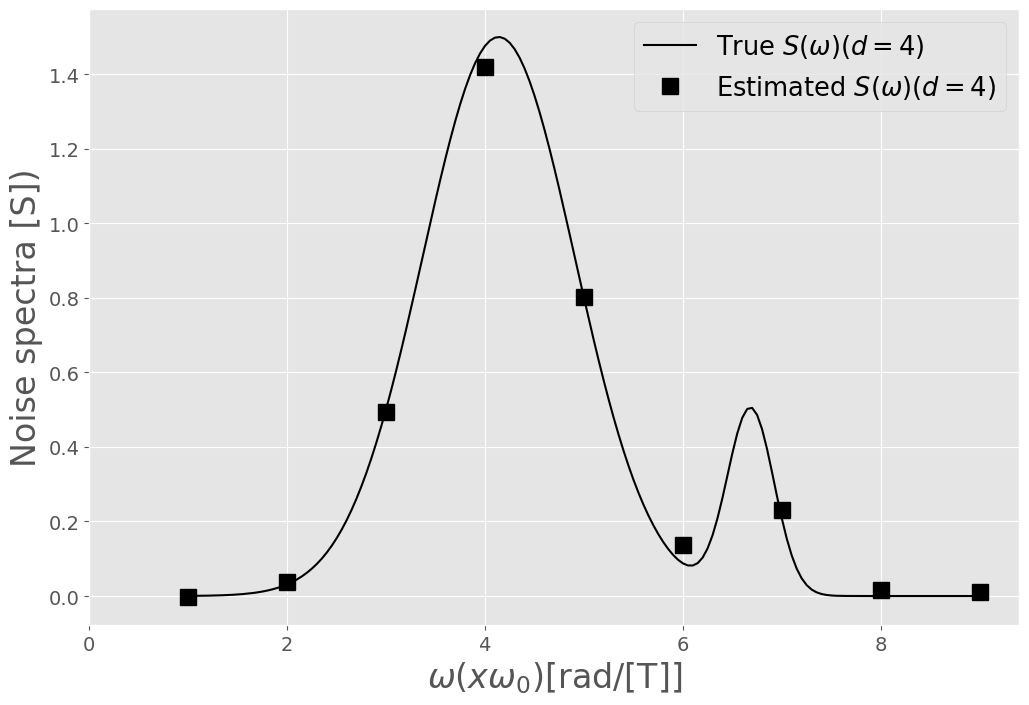

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14


plt.plot( w1, spect1,'k' ,omega, S1 ,'ks', markersize = 12) 
#plt.plot( w1, spect1,'g' ,omega, S1 ,'gs', w1, spect2, 'k',omega, S2 ,'ko', w1, spect3, 'b', omega, S3 ,'b^', markersize = 12) 
plt.xlabel('$\omega( x\omega_0)$[rad/[T]]', fontsize=24)
plt.xticks(np.arange(0, (N+1)*wr(1), step=T*wr(1)),np.arange(0,N+1,step=T))
plt.ylabel('Noise spectra [S])', fontsize=24)
plt.legend(['True $S(\omega) (d=4)$','Estimated $S(\omega) (d=4)$'],\
          prop={'size': 18.5})

####plt.show()
plt.savefig('Fig4b-d4.pdf')

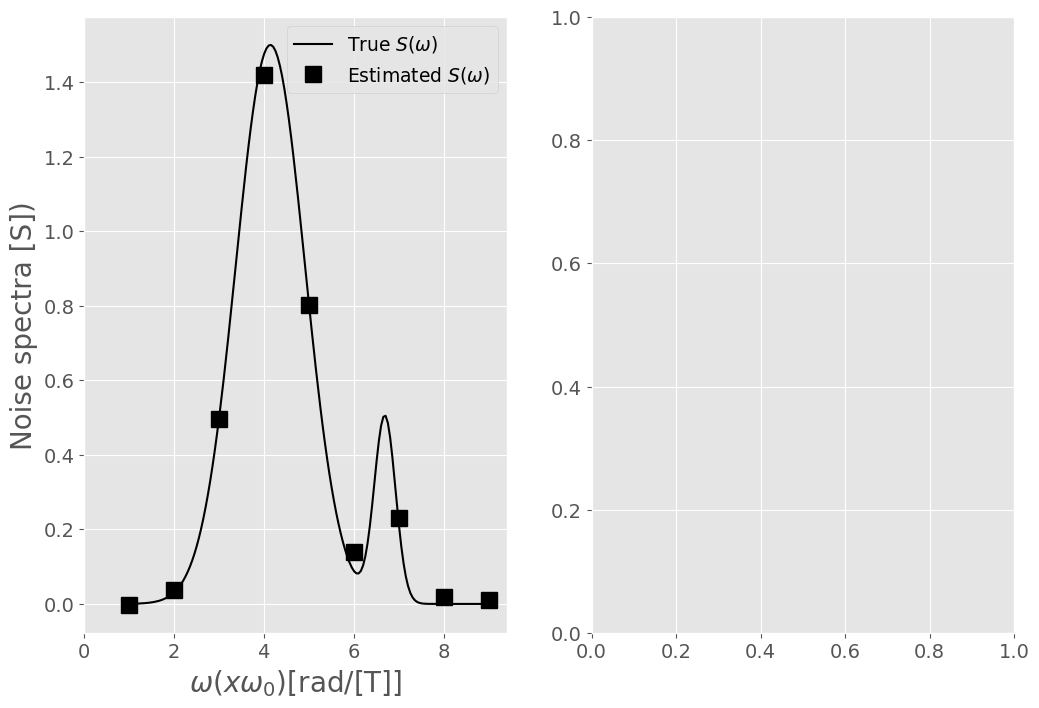

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(w1, spect1,'k-',omega, S1 ,'ks', markersize = 12)  
ax1.set_xlabel('$\omega( x\omega_0)$[rad/[T]]', fontsize=20) #
ax1.set_xticks(np.arange(0, (N+1)*wr(1), step=T*wr(1)),np.arange(0,N+1,step=T))
ax1.set_ylabel('Noise spectra [S])', fontsize=20) #
ax1.legend(['True $S(\omega)$','Estimated $S(\omega)$'],\
          prop={'size': 13.5})
##plt.show()

plt.savefig('Fig4a-d=4.pdf')

##listM = [7, 15, 35,  55,  70,  80]
##listd = [3,  4,  5,   6,   7,   8]
##ax2.plot(listM , listd ,'ko')
##ax2.set_xlabel('Iterations (M)', fontsize=13) #
##ax2.set_ylabel('Qudit order (d)', fontsize=13) #
###ax2.legend(['True $S(\omega)$','Estimated $S(\omega)$'],\
###          prop={'size': 9.5})

In [26]:
et = time.time()
elapsed_time1 = (et - st)/60
elapsed_time2 = (et - st)/3600
print('time:', elapsed_time1, 'minutes or', elapsed_time2, 'hours')  

time: 75.45669129689534 minutes or 1.2576115216149224 hours
